In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn


In [2]:
#Importing the data
data_5g = pd.read_csv('Datasets/output_with_5g.csv')
data = pd.read_csv('Datasets/output.csv')

print(data_5g.head())
print(data.head())
print(data_5g.columns)
print(data.columns)
print(data_5g.info())
print(data.info())
print(data_5g.describe())
print(data.describe())

   Unnamed: 0   mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0           0  2.85       84726         1030        134      19            0
1           1  2.27       53510          540        122      21            0
2           2  2.91       75756         1920         80      16            0
3           3  2.10      131389          690        102      25         1000
4           4  2.24      337008         2230        133      15            0
    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0  1.96      238472          660        195      18         1000
1  1.80       70946          300        181      23            0
2  2.25      316053          460        176      14         1000
3  1.88      160097          290        152      24            0
4  3.51      204129          770        104      26            0
Index(['Unnamed: 0', 'mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')
Index(['mos', 'throughp

In [3]:
#merge the two datasets into one with no new columns
data_5g = data_5g.drop(columns=['Unnamed: 0'])

frames = [data, data_5g]
data = pd.concat(frames, axis=0, ignore_index=True)
print(data.head())
print(data.columns)
print(data.info())
print(data.describe())


    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0  1.96      238472          660        195      18         1000
1  1.80       70946          300        181      23            0
2  2.25      316053          460        176      14         1000
3  1.88      160097          290        152      24            0
4  3.51      204129          770        104      26            0
Index(['mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42281 entries, 0 to 42280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mos          42281 non-null  float64
 1   throughput   42281 non-null  int64  
 2   avg_bitrate  42281 non-null  int64  
 3   delay_qos    42281 non-null  int64  
 4   jitter       42281 non-null  int64  
 5   packet_loss  42281 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.9 MB
None


In [4]:
#Data cleaning 
for i in range(len(data)):
    if data['delay_qos'][i] == -1000 \
    or data['delay_qos'][i] == 0 or data['avg_bitrate'][i] == 0:
        data = data.drop([i])
        continue
    if data['jitter'][i] == 0:
        data['jitter'][i] = 1
    if data['jitter'][i] == -1000:
        data['jitter'][i] = 1


print (str(len(data)) + ' Data Loaded Successfully')

42281 Data Loaded Successfully


In [5]:
#Feature engineering
# Adding new features : Derive new features like interactions, olynomials, log etc...

data['delay_log'] = np.log(data['delay_qos']+1)
data['bitrate_log'] = np.log(data['avg_bitrate']+1)

data['packet_loss_squared'] = data['packet_loss'] ** 2
data['throughput_jitter'] = data['throughput'] * data['jitter']
data['delay_jitter'] = data['delay_qos'] * data['jitter']
data['loss_rate'] = data['avg_bitrate'] / (data['packet_loss'] + 1)

In [6]:
print(data.head())

    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss  delay_log  \
0  1.96      238472          660        195      18         1000   5.278115   
1  1.80       70946          300        181      23            0   5.204007   
2  2.25      316053          460        176      14         1000   5.176150   
3  1.88      160097          290        152      24            0   5.030438   
4  3.51      204129          770        104      26            0   4.653960   

   bitrate_log  packet_loss_squared  throughput_jitter  delay_jitter  \
0     6.493754              1000000            4292496          3510   
1     5.707110                    0            1631758          4163   
2     6.133398              1000000            4424742          2464   
3     5.673323                    0            3842328          3648   
4     6.647688                    0            5307354          2704   

    loss_rate  
0    0.659341  
1  300.000000  
2    0.459540  
3  290.000000  
4  770.00000

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [8]:
# Séparer X et y
X = data.drop(columns=["mos"])
y = data["mos"]

In [12]:
# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèles à tester
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "SVR": SVR(),
    "MLP (Neural Network)": MLPRegressor(max_iter=500, random_state=42)
}


/Users/zahimchared/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/zahimchared/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/zahimchared/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/zahimchared/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.

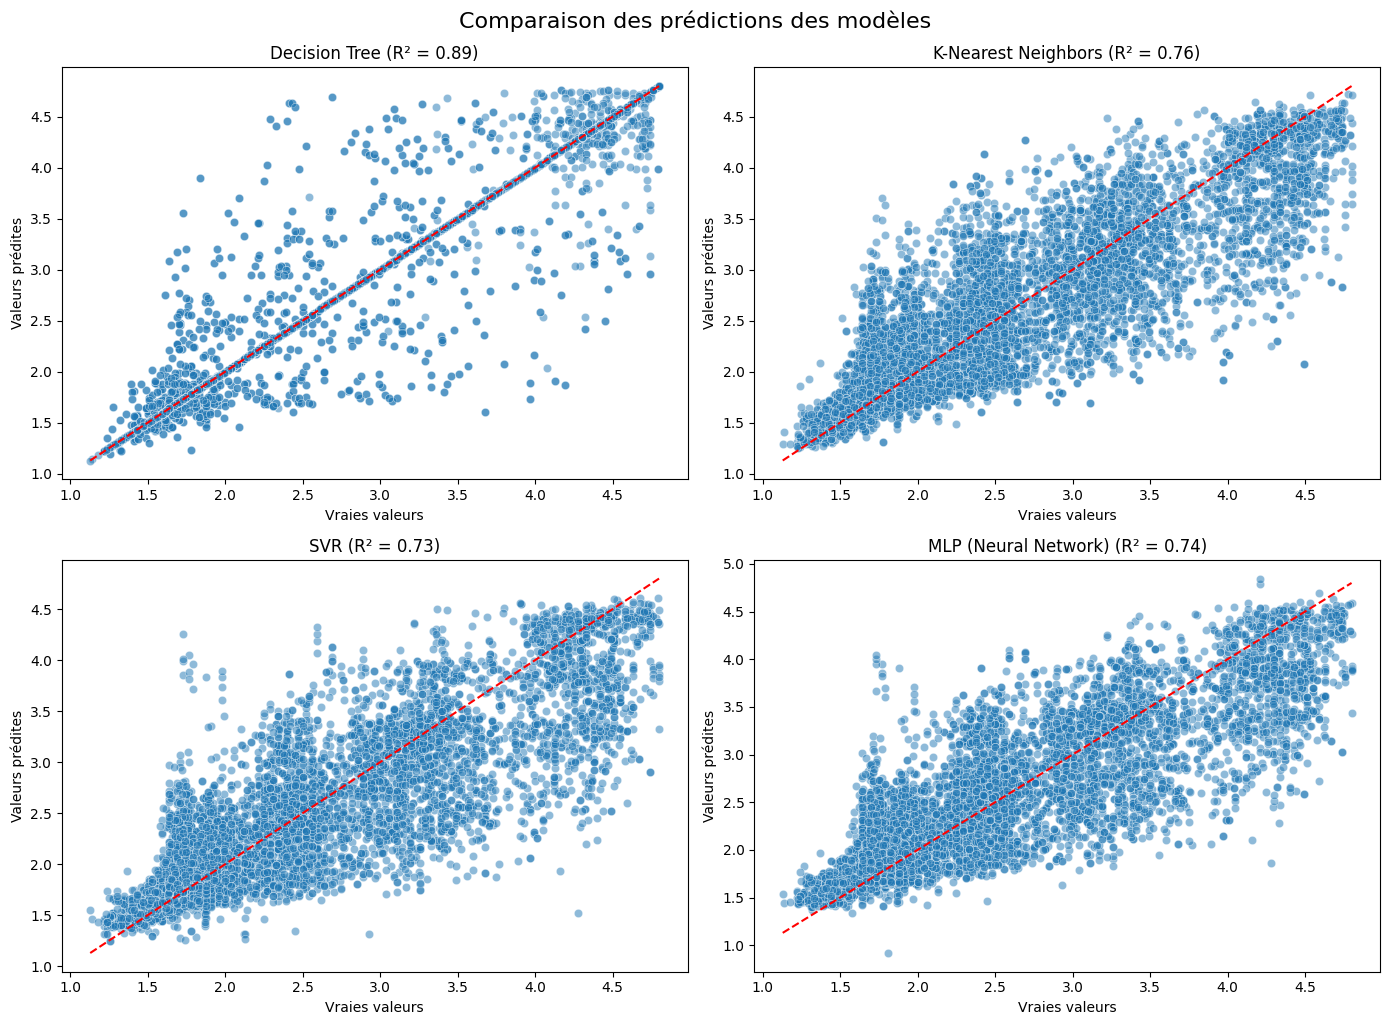


📊 Classement des modèles par performance (R² décroissant) :


,Model,MAE,RMSE,R²
0,Decision Tree,0.099106,0.300083,0.893775
1,K-Nearest Neighbors,0.316981,0.455570,0.755174
3,MLP (Neural Network),0.334841,0.468447,0.741138
2,SVR,0.327994,0.478176,0.730274


In [14]:
# Résultats pour comparaison
results = []

# Visualisation des erreurs
plt.figure(figsize=(14, 10))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })
    
    # Plot erreurs
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Vraies valeurs")
    plt.ylabel("Valeurs prédites")
    plt.title(f"{name} (R² = {r2:.2f})")

plt.tight_layout()
plt.suptitle("Comparaison des prédictions des modèles", fontsize=16, y=1.02)
plt.show()

# Tableau de performance
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="R²", ascending=False)

# Affichage des résultats triés
print("\n📊 Classement des modèles par performance (R² décroissant) :")
display(df_results_sorted)
